In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
netflix = pd.read_csv("Netflix_DataAnalysis/netflix_titles.csv")

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
netflix.shape

(8807, 12)

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [12]:
netflix.isnull().sum()/len(netflix)*100 # There is too much missing values on director column. So we going to drop that column.

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [13]:
netflix.drop("director", axis=1, inplace=True)

Text(0.5, 1.0, 'Yıla Göre Yayınlanan Film Sayısı')

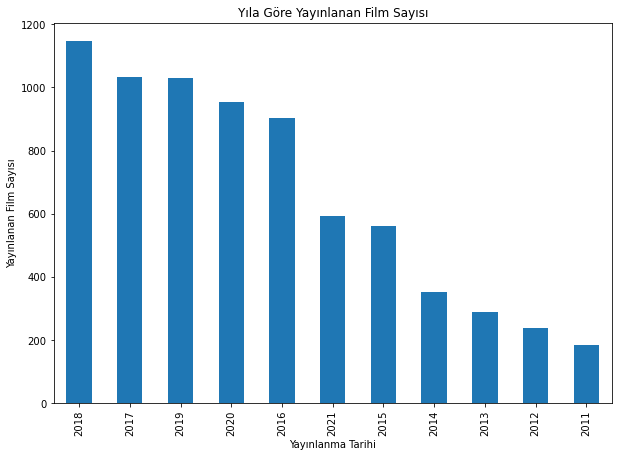

In [38]:
plt.figure(figsize=(13,10))
g = netflix[netflix['release_year'] > 2010].release_year.value_counts().plot.bar(figsize=(10, 7))
g.set_xlabel("Yayınlanma Tarihi")
g.set_ylabel("Yayınlanan Film Sayısı")
g.set_title("Yıla Göre Yayınlanan Film Sayısı")

Text(0, 0.5, 'Türler')

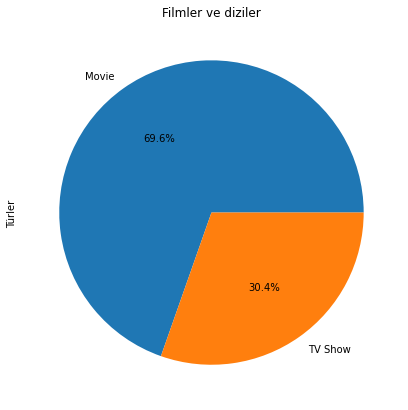

In [36]:
g = netflix.type.value_counts().plot.pie(
             figsize=(10, 7),autopct= "%1.1f%%")
g.set_title("Filmler ve diziler")
g.set_ylabel("Türler")

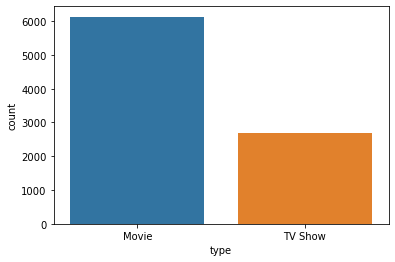

In [41]:
ax = sns.countplot(x="type", data=netflix)

In [30]:
netflix[netflix['type'] == 'TV Show'].sort_values('release_year')[0:10]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,United States,"February 9, 2021",1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),Rod Serling,United States,"July 1, 2017",1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
4550,s4551,TV Show,Monty Python's Fliegender Zirkus,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",1972,TV-MA,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
4551,s4552,TV Show,Monty Python's Flying Circus,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,"October 2, 2018",1974,TV-14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
6549,s6550,TV Show,Dad's Army,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,"March 31, 2018",1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
6674,s6675,TV Show,El Chavo,"Roberto Gómez Bolaños, María Antonieta de las ...",Mexico,"December 31, 2017",1979,TV-PG,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ..."
7588,s7589,TV Show,Ninja Hattori,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...


Text(0.5, 1.0, 'Aylara Göre Filmlerin Çıkış Dağılımı')

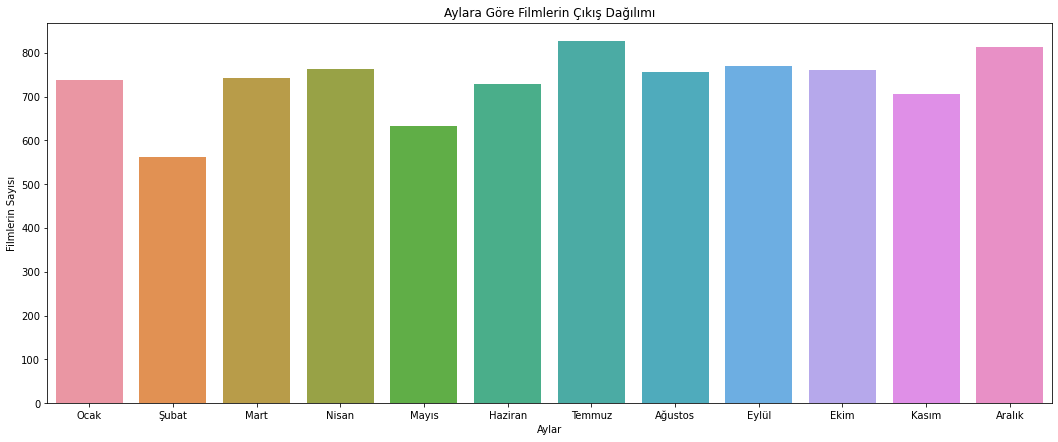

In [ ]:
netflix['month'] = pd.to_datetime(netflix['date_added']).dt.month
plt.figure(figsize=(18,7))

g = sns.countplot(x='month', data=netflix)
g.set_xticklabels(['Ocak','Şubat','Mart','Nisan',
       'Mayıs','Haziran','Temmuz','Ağustos','Eylül','Ekim',
       'Kasım','Aralık'])
g.set_xlabel("Aylar")
g.set_ylabel("Filmlerin Sayısı")
g.set_title("Aylara Göre Filmlerin Çıkış Dağılımı")

In [97]:
dataTurkey = netflix[netflix["country"]=="Turkey"].sort_values("date_added")[0:]
# dataTurkey.count() # 105

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month
5542,s5543,TV Show,Burned Cocoon,"Yavuz Bingöl, Basak Köklükaya, Çolpan Ilhan, M...",Turkey,"April 1, 2017",2005,TV-MA,1 Season,"International TV Shows, TV Dramas",A secret marriage unites two families – one we...,4.0
3922,s3923,Movie,Dabbe 5: Zehr-i Cin,"Nil Günal, Ümit Bülent Dinçer, Sultan Köroğlu ...",Turkey,"April 12, 2019",2014,TV-MA,133 min,"Horror Movies, International Movies",When Dilek becomes haunted by evil spirits and...,4.0
3923,s3924,Movie,Dabbe: The Possession,"Cansu Kurgun, Irmak Örnek, A. Murat Özgen, Sul...",Turkey,"April 12, 2019",2013,TV-MA,135 min,"Horror Movies, International Movies","Ahead of her wedding, Kübra is possessed by de...",4.0
6750,s6751,TV Show,Filinta,"Onur Tuna, Serhat Tutumluer, Mehmet Özgür, Naz...",Turkey,"April 15, 2017",2015,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...","In 19th-century Istanbul, a young police offic...",4.0
7295,s7296,TV Show,Leyla and Mecnun,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,"April 15, 2017",2014,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3507,s3508,Movie,Travel Mates 2,"Oğuzhan Koç, İbrahim Büyükak, Ezgi Eyüboğlu, O...",Turkey,"September 20, 2019",2018,TV-MA,111 min,"Comedies, International Movies",When struggling singer Onur decides to return ...,9.0
21,s22,TV Show,Resurrection: Ertugrul,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,9.0
3482,s3483,Movie,Deliha 2,"Gupse Özay, Eda Ece, Aksel Bonfil, Derya Alabo...",Turkey,"September 27, 2019",2018,TV-PG,102 min,"Comedies, International Movies","While chasing her dream of becoming a chef, Ze...",9.0
3533,s3534,Movie,Kill Me If You Dare,"Murat Boz, Seda Bakan, Açelya Topaloğlu, Özgür...",Turkey,"September 6, 2019",2019,TV-14,100 min,"Comedies, International Movies, Romantic Movies","Bogged down with money problems, a couple grow...",9.0
